In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

In [71]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### EDA 

In [72]:
df.shape

(299, 13)

In [73]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [75]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [76]:
df.duplicated().sum()

0

In [77]:
# 3) Target distribution (class balance)
target_col = "DEATH_EVENT"
print(df[target_col].value_counts(normalize=True).rename("proportion"))

DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64


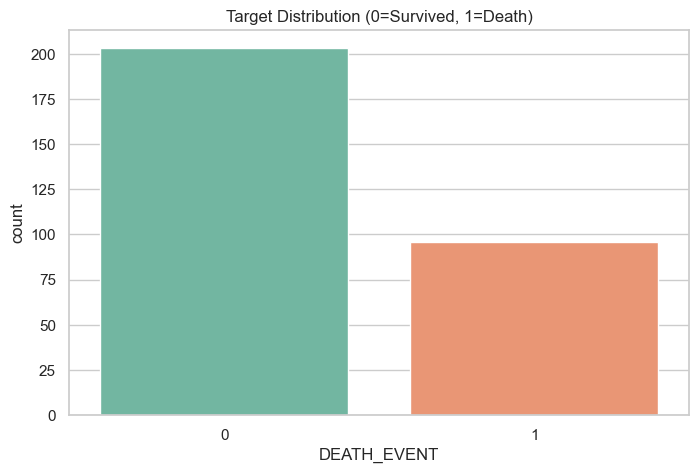

In [78]:
# 3. Target Variable Distribution
# =========================
plt.figure()
sns.countplot(x='DEATH_EVENT', data=df, palette="Set2")
plt.title("Target Distribution (0=Survived, 1=Death)")
plt.show()

C:\Users\HP\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


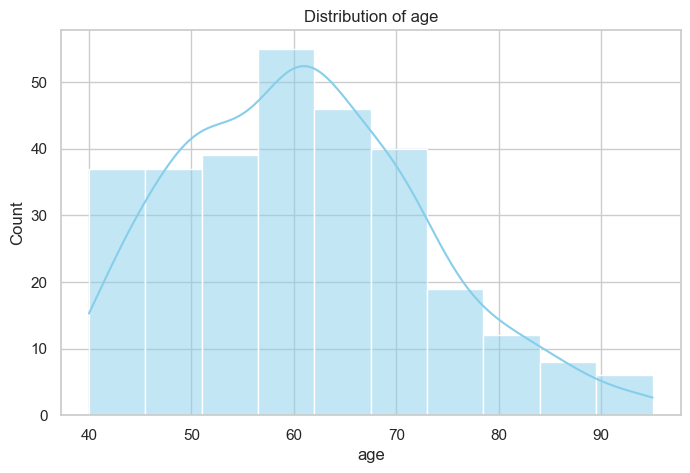

C:\Users\HP\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


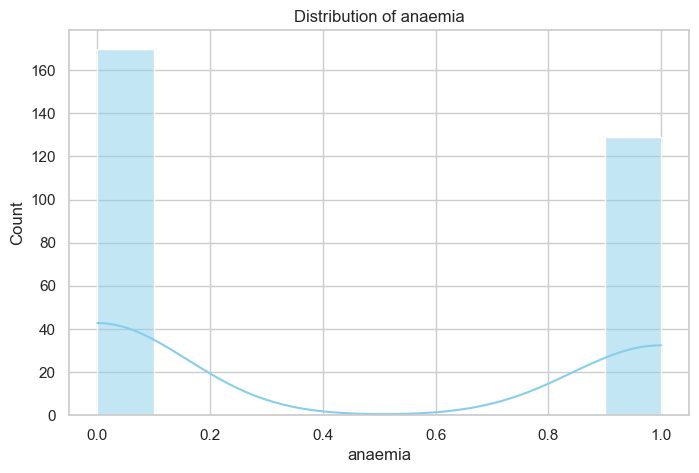

C:\Users\HP\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


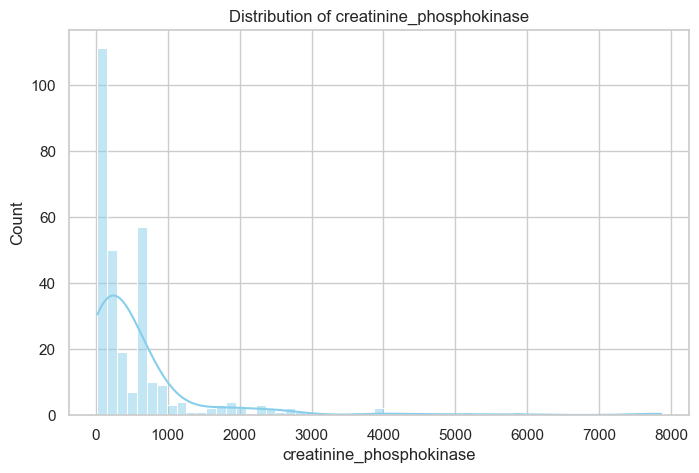

C:\Users\HP\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


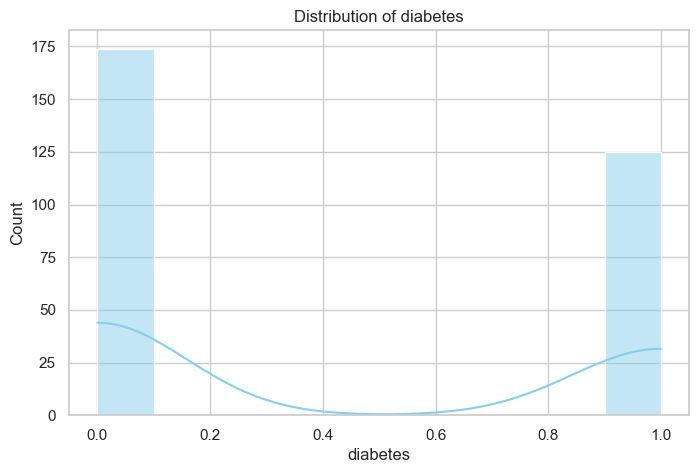

C:\Users\HP\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


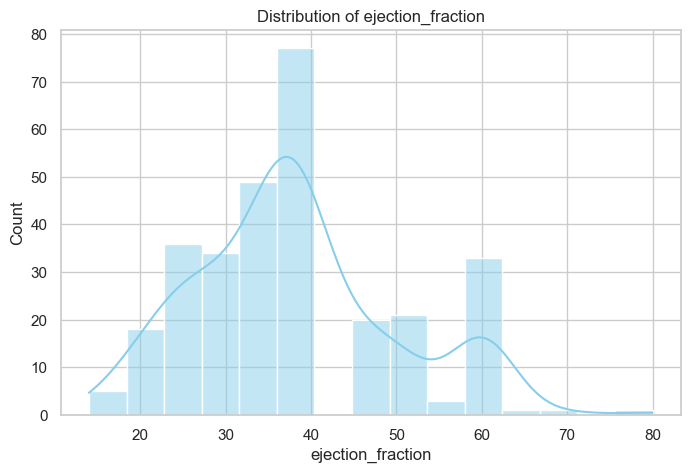

C:\Users\HP\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


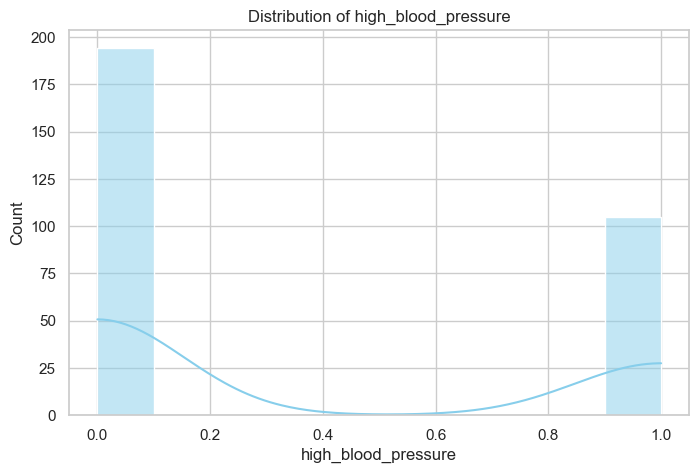

C:\Users\HP\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


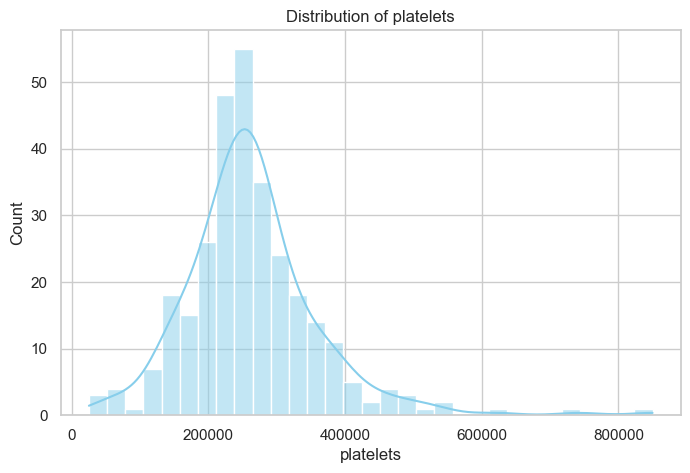

C:\Users\HP\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


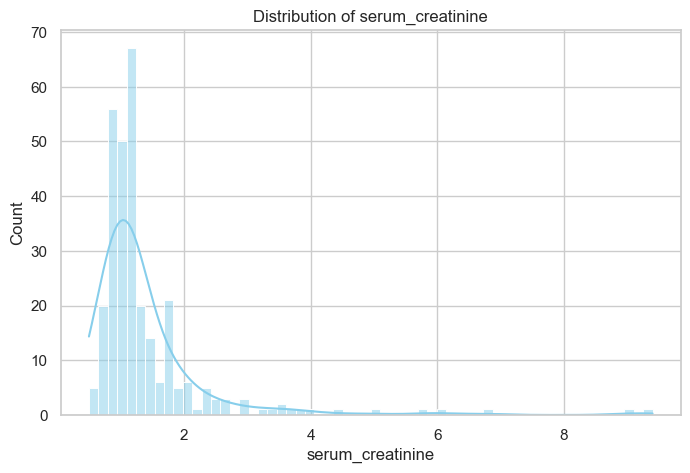

C:\Users\HP\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


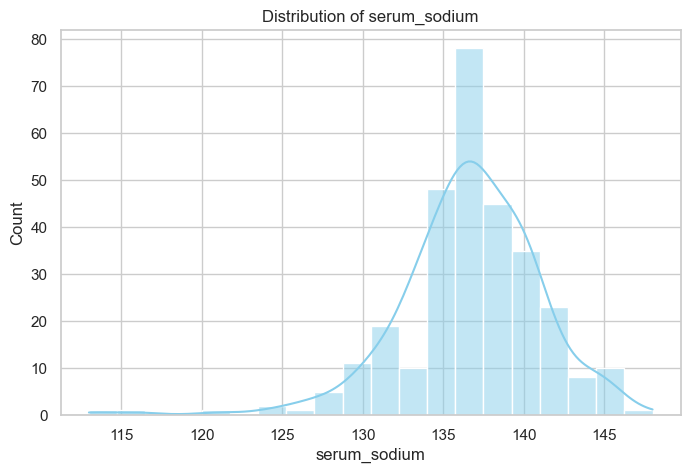

C:\Users\HP\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


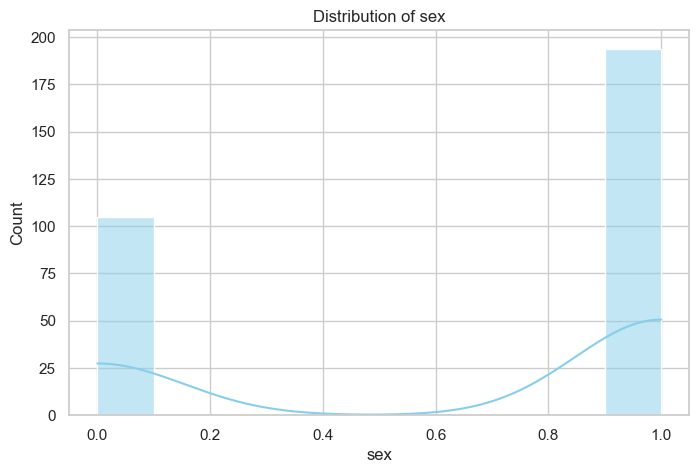

C:\Users\HP\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


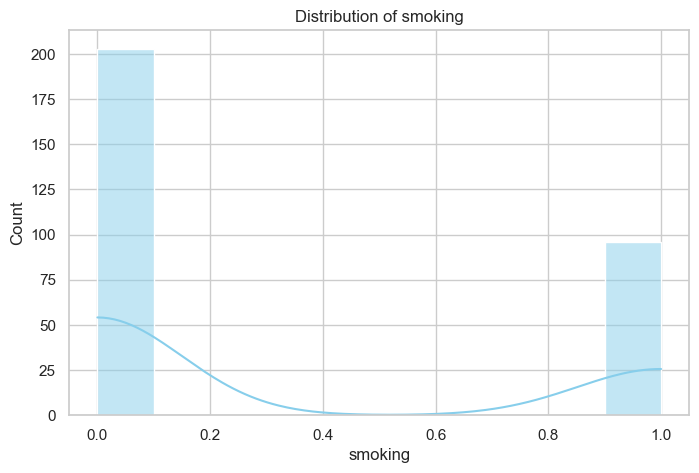

C:\Users\HP\anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


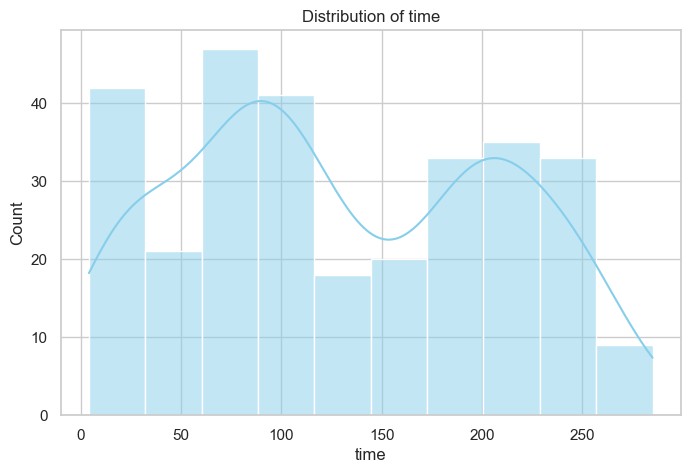

In [79]:
# =========================
# 4. Univariate Analysis
# =========================
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('DEATH_EVENT')  # Exclude target

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

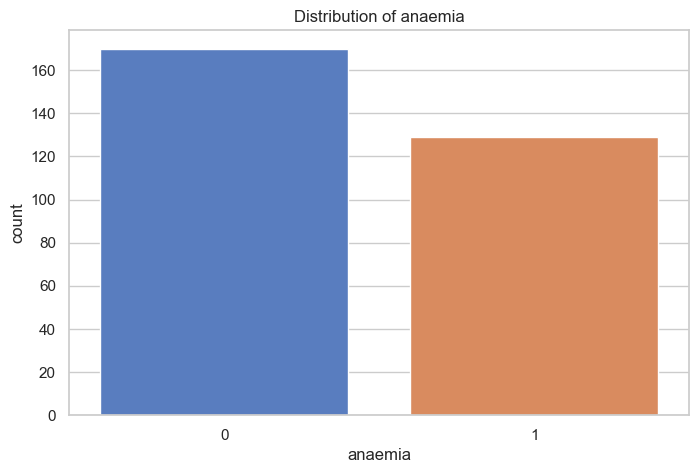

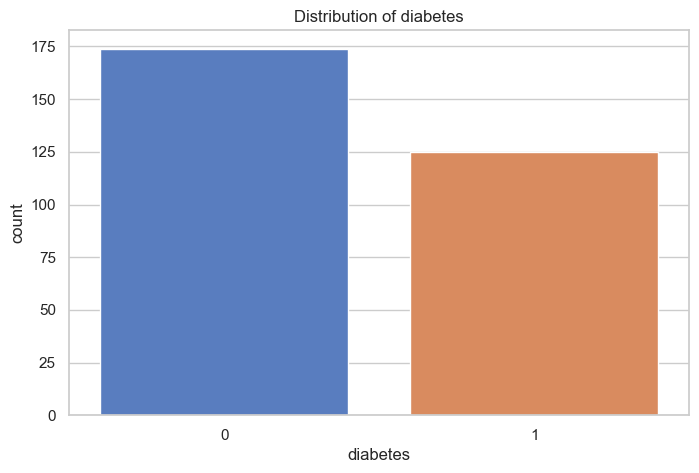

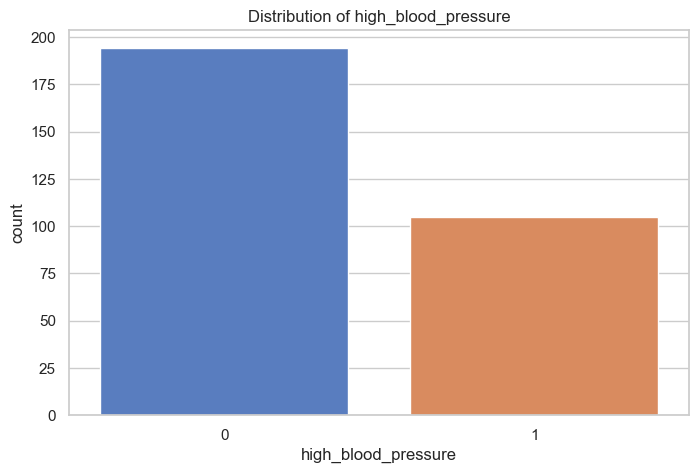

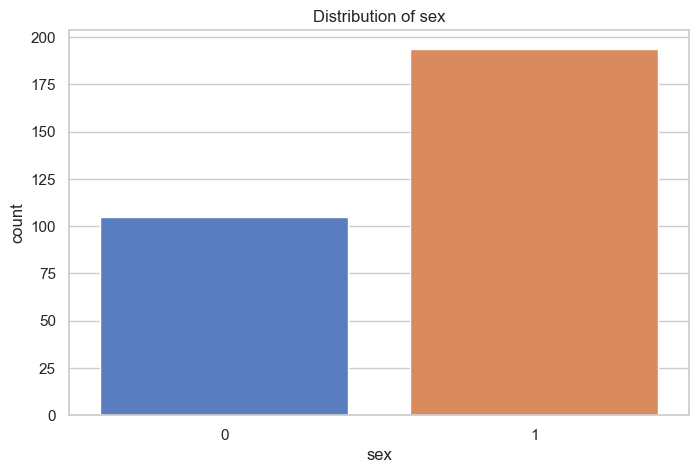

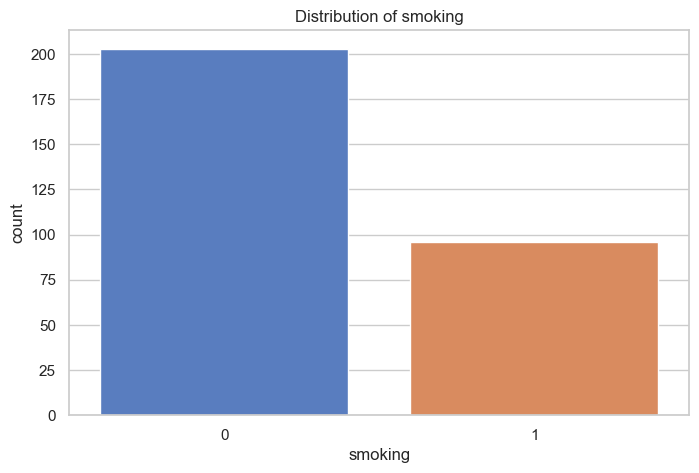

In [80]:
# =========================
# 5. Categorical Feature Distributions
# =========================
cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df, palette="muted")
    plt.title(f"Distribution of {col}")
    plt.show()

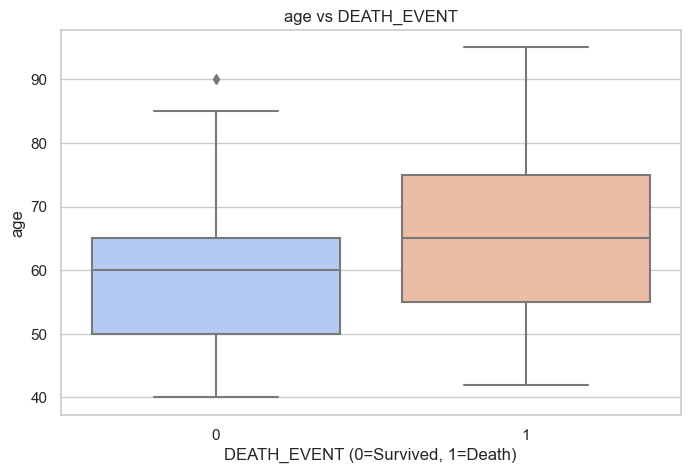

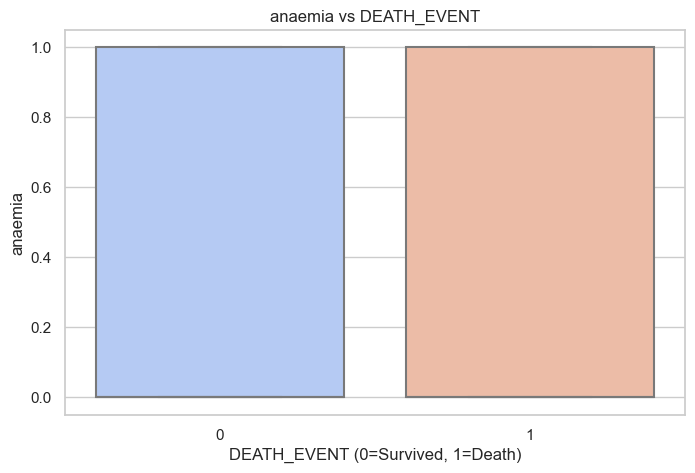

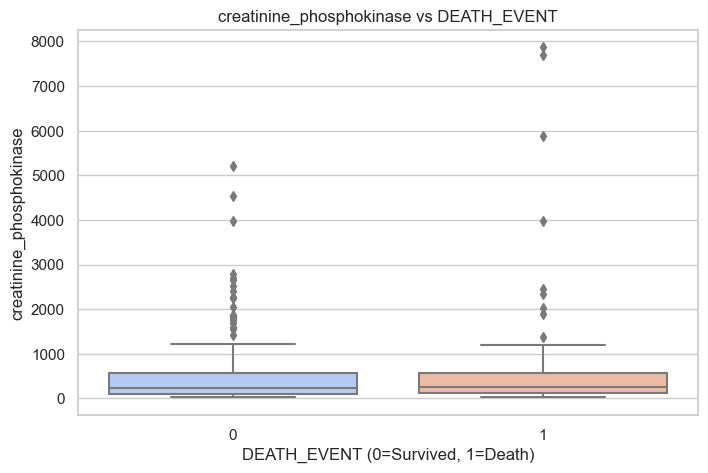

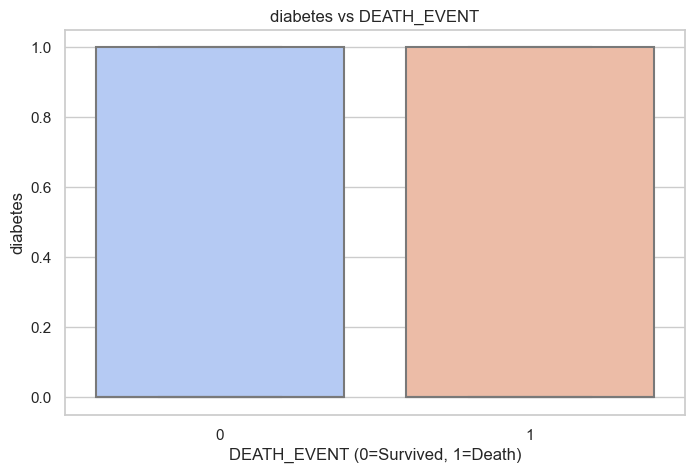

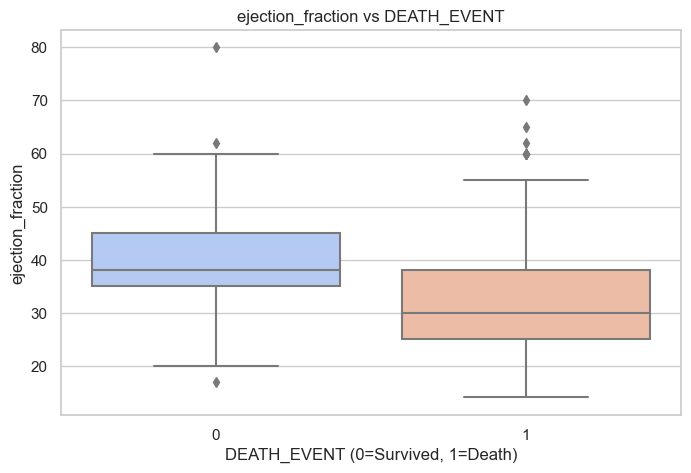

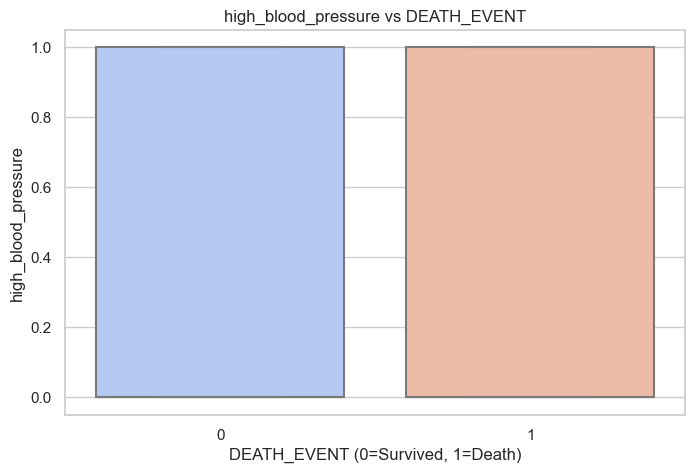

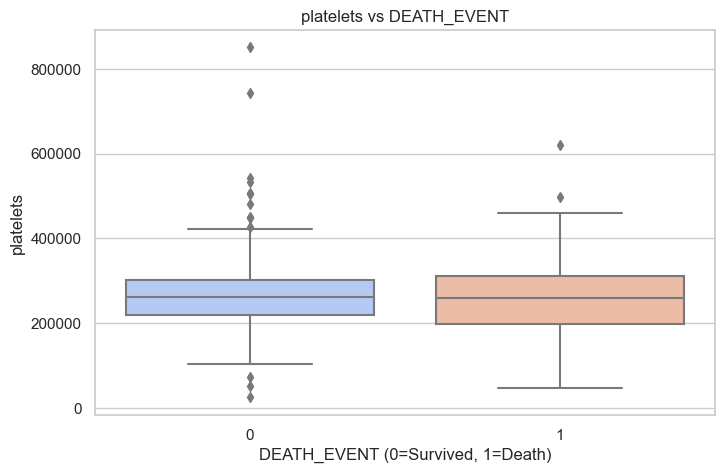

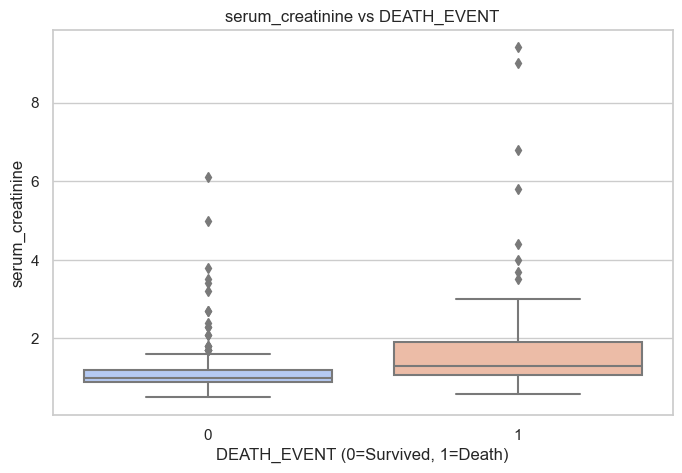

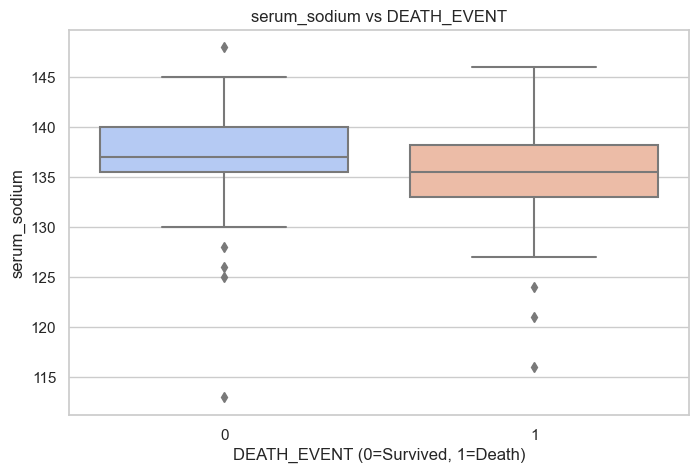

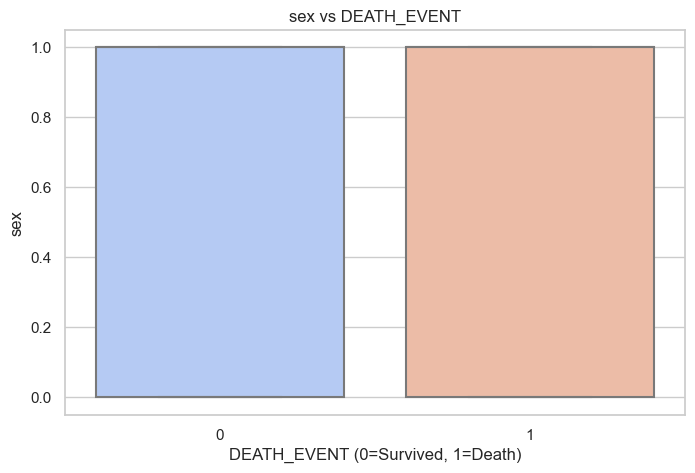

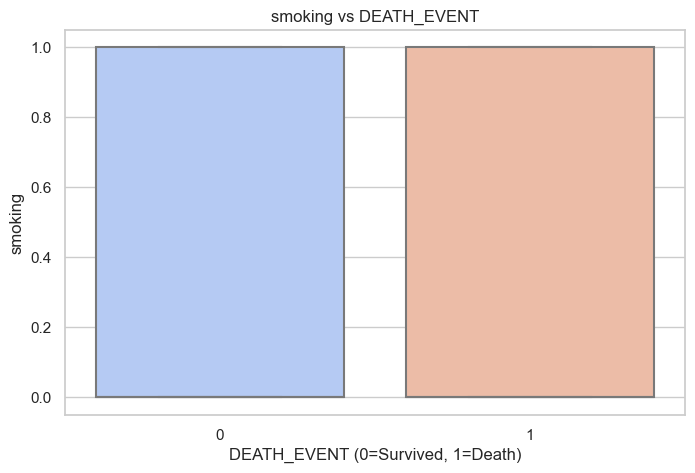

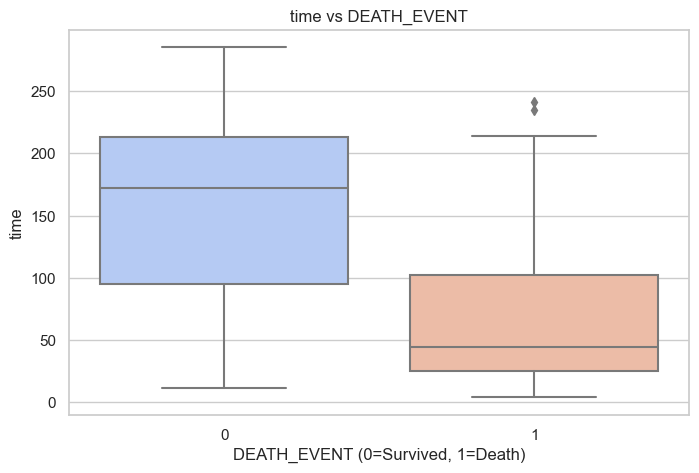

In [81]:
# =========================
# 6. Bivariate Analysis with Target
# =========================
# Numeric vs Target
for col in num_cols:
    plt.figure()
    sns.boxplot(x='DEATH_EVENT', y=col, data=df, palette="coolwarm")
    plt.title(f"{col} vs DEATH_EVENT")
    plt.xlabel("DEATH_EVENT (0=Survived, 1=Death)")
    plt.ylabel(col)
    plt.show()

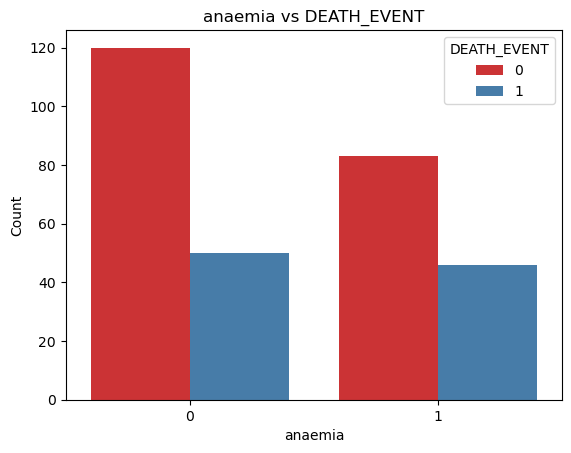

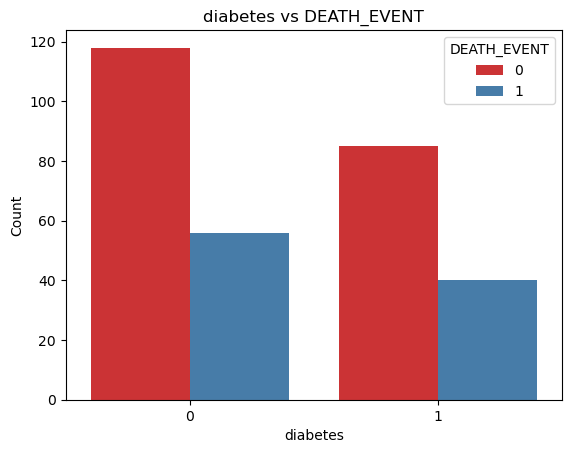

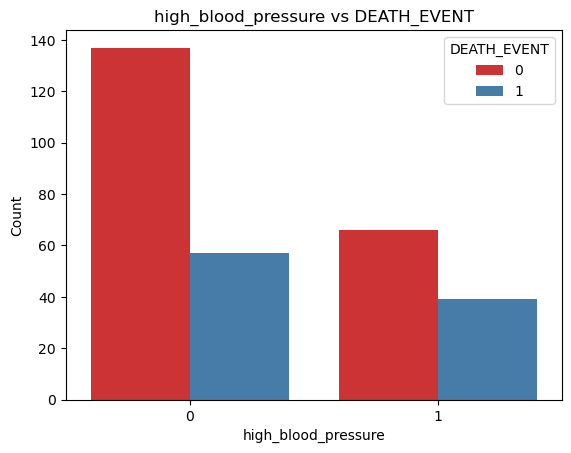

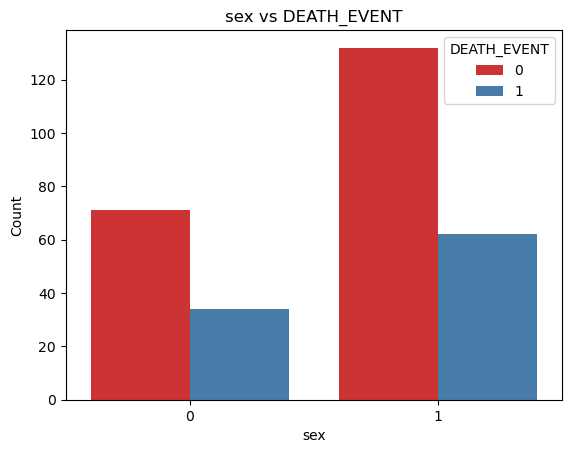

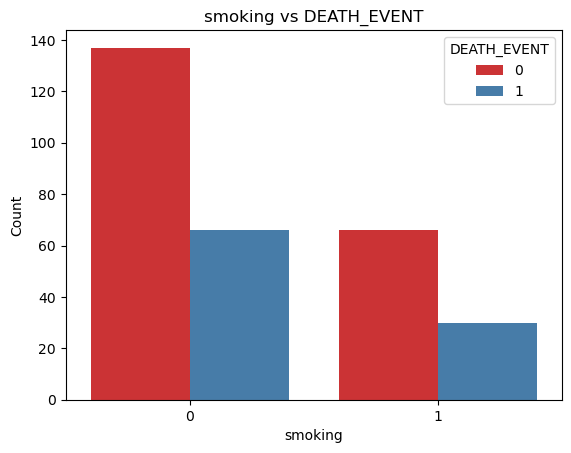

In [67]:
# Categorical vs Target
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, hue='DEATH_EVENT', data=df, palette="Set1")
    plt.title(f"{col} vs DEATH_EVENT")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="DEATH_EVENT")
    plt.show()

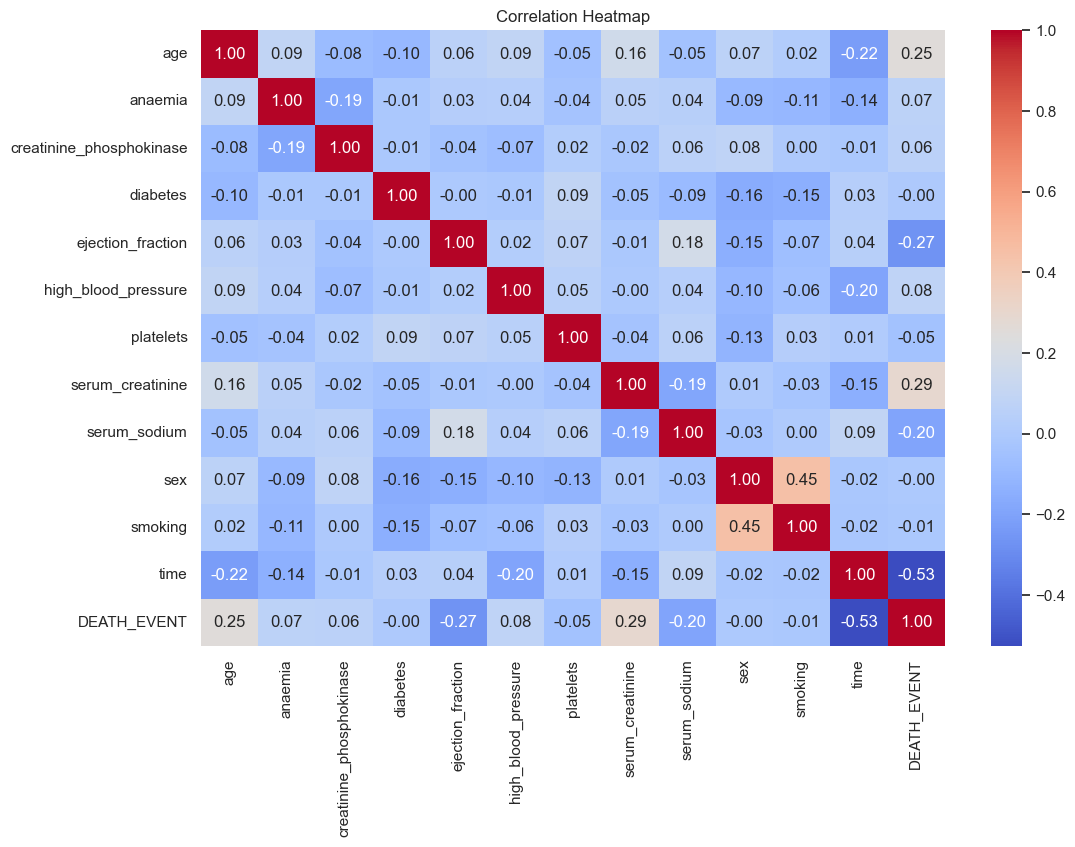

In [82]:
# =========================
# 7. Correlation Analysis
# =========================
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

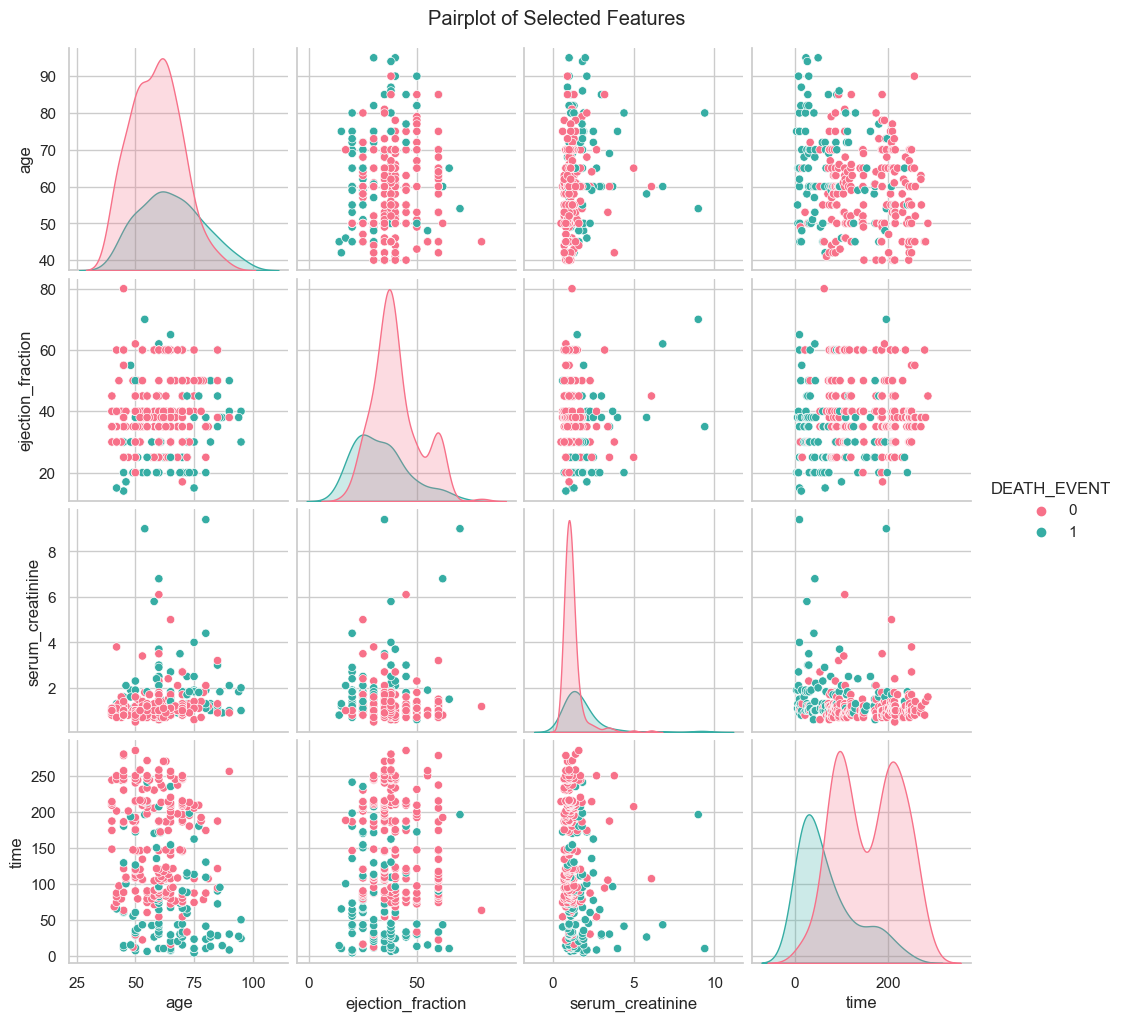

In [83]:
# =========================
# 8. Pairplot (Optional but good for report)
# =========================
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df, vars=['age','ejection_fraction','serum_creatinine','time'], hue='DEATH_EVENT', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [ ]:
"""
Observations:
1. Target variable is slightly imbalanced (more survivors than deaths).
2. Time (follow-up period) tends to be shorter for patients who died.
3. Age group mostly 40–70; older patients show higher death risk.
4. Anaemia, diabetes, and high blood pressure show moderate influence but need model validation.
"""

### Preprocessing

In [84]:
# 1) Dropping duplicates
df = df.drop_duplicates().reset_index(drop=True)

In [85]:
# 2) Handling missing values defensively
for c in df.columns:
    if df[c].dtype.kind in "biufc":   # numeric
        df[c] = df[c].fillna(df[c].median())

In [86]:
# 3) Splitting features/target
X = df.drop(columns=[target_col]).values.astype(np.float32)
y = df[target_col].values.astype(np.float32)

In [87]:
# First split: train+val vs test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [88]:
# Second split: train vs val
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval)

In [89]:
# 4) Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_val   = scaler.transform(X_val).astype(np.float32)
X_test  = scaler.transform(X_test).astype(np.float32)

X_train.shape, X_val.shape, X_test.shape

((191, 12), (48, 12), (60, 12))

### Model Building

In [90]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [91]:
torch.manual_seed(42)

In [92]:
# Tensors & Datasets
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

X_val_t   = torch.tensor(X_val, dtype=torch.float32)
y_val_t   = torch.tensor(y_val.reshape(-1, 1), dtype=torch.float32)

X_test_t  = torch.tensor(X_test, dtype=torch.float32)
y_test_t  = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

In [93]:
train_ds = TensorDataset(X_train_t, y_train_t)
val_ds   = TensorDataset(X_val_t, y_val_t)
test_ds  = TensorDataset(X_test_t, y_test_t)

In [94]:
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=256, shuffle=False)

In [95]:
# Computing pos_weight = (num_neg / num_pos) from TRAIN ONLY
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
pos_weight = torch.tensor([neg / max(pos, 1)], dtype=torch.float32)
pos, neg, pos_weight

(62, 129, tensor([2.0806]))

In [96]:
# Model
class MLP(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(32, 1)  # logits
        )

    def forward(self, x):
        return self.net(x)

model = MLP(in_features=X_train.shape[1])

In [97]:
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [98]:
# Training loop with early stopping on val loss
best_val_loss = float('inf')
patience = 10
patience_ctr = 0
EPOCHS = 200

def run_epoch(loader, train=True):
    if train:
        model.train()
    else:
        model.eval()

    epoch_loss = 0.0
    with torch.set_grad_enabled(train):
        for xb, yb in loader:
            logits = model(xb)                
            loss = criterion(logits, yb)      

            if train:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            epoch_loss += loss.item() * xb.size(0)

    return epoch_loss / len(loader.dataset)

In [99]:
for epoch in range(1, EPOCHS+1):
    tr_loss = run_epoch(train_loader, train=True)
    va_loss = run_epoch(val_loader, train=False)

    if va_loss < best_val_loss - 1e-4:
        best_val_loss = va_loss
        patience_ctr = 0
        torch.save(model.state_dict(), "best_hf_mlp.pt")
    else:
        patience_ctr += 1

    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch:03d} | train_loss={tr_loss:.4f} | val_loss={va_loss:.4f}")

    if patience_ctr >= patience:
        print("Early stopping.")
        break


model.load_state_dict(torch.load("best_hf_mlp.pt"))

Epoch 001 | train_loss=0.9565 | val_loss=0.9079
Epoch 010 | train_loss=0.6907 | val_loss=0.6582
Epoch 020 | train_loss=0.5816 | val_loss=0.5212
Epoch 030 | train_loss=0.5328 | val_loss=0.4710
Epoch 040 | train_loss=0.4300 | val_loss=0.4560
Epoch 050 | train_loss=0.4157 | val_loss=0.4560
Early stopping.


<All keys matched successfully>

In [100]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def predict_proba(loader):
    model.eval()
    probs = []
    with torch.no_grad():
        for xb, _ in loader:
            logits = model(xb)
            p = torch.sigmoid(logits)
            probs.append(p.cpu().numpy())
    return np.vstack(probs).ravel()

# Probabilities
p_test = predict_proba(test_loader)

In [101]:
# Choosing threshold (0.5 default; you can tune for best F1/Recall)
y_pred = (p_test >= 0.31).astype(int)
y_true = y_test.astype(int)

print("Precision:", precision_score(y_true, y_pred).round(4))
print("Recall   :", recall_score(y_true, y_pred).round(4))
print("F1       :", f1_score(y_true, y_pred).round(4))
print("ROC-AUC  :", roc_auc_score(y_true, p_test).round(4))
print("\nClassification report:\n", classification_report(y_true, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))

Precision: 0.5333
Recall   : 0.8421
F1       : 0.6531
ROC-AUC  : 0.8062

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.66      0.76        41
           1       0.53      0.84      0.65        19

    accuracy                           0.72        60
   macro avg       0.72      0.75      0.71        60
weighted avg       0.78      0.72      0.73        60

Confusion matrix:
 [[27 14]
 [ 3 16]]


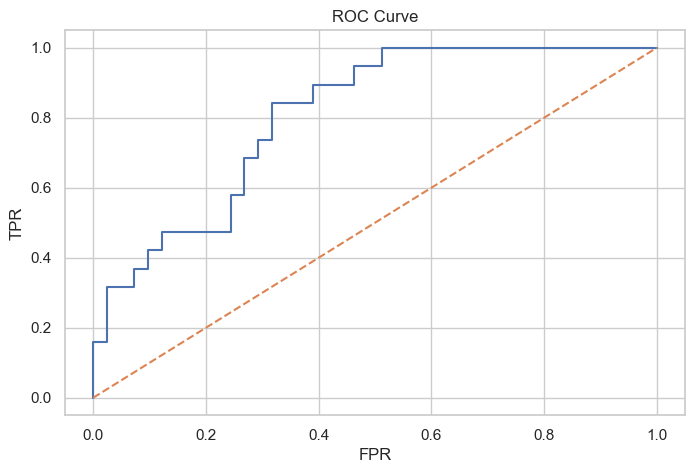

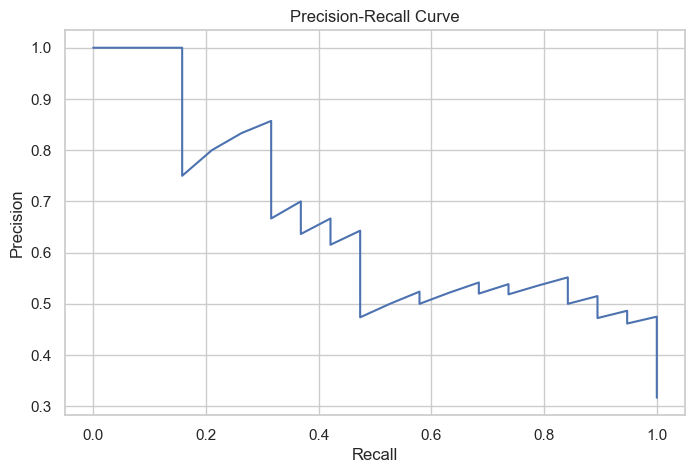

In [102]:
# ROC curve
fpr, tpr, _ = roc_curve(y_true, p_test)
plt.plot(fpr, tpr); plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve"); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.show()

# Precision-Recall curve
prec, rec, _ = precision_recall_curve(y_true, p_test)
plt.plot(rec, prec)
plt.title("Precision-Recall Curve"); plt.xlabel("Recall"); plt.ylabel("Precision"); plt.show()

In [104]:
torch.save(model.state_dict(), "heart_model.pth")

In [ ]:
'''
Conclusion

The heart failure risk prediction model demonstrates a good ability to identify patients at risk, as reflected by a high 
recall (84%), meaning the model successfully detects most positive (high-risk) cases. This is crucial in healthcare scenarios 
where missing a high-risk patient could lead to severe outcomes.

The precision (53%) indicates that while some false positives exist, the model still provides reasonably reliable predictions. 
The F1-score (65%) reflects a good balance between precision and recall, while the ROC-AUC (0.81) shows strong overall 
discriminative power of the model.

The confusion matrix visualization highlights that most positive cases are correctly predicted, while the ROC curve 
indicates the model is significantly better than random guessing.

Overall, the model demonstrates that it can be a useful decision-support tool in predicting heart failure risk and prioritizing high-risk patients for further clinical assessment.

'''